<a href="https://colab.research.google.com/github/EgorDudyrev/FCApy_tutorials/blob/main/Adult_Dataset_Use_Case_(CoNo_Concepts_workshop).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Jupyter-Notebook tutorial on FCApy: 
## an FCA package for python data science environment
by Egor Dudyrev, PhD in Université de Lorraine and HSE University

for “Computational Notebooks for FCA” workshop at ICFCA2023: https://www.kde.cs.uni-kassel.de/icfca2023/cono-concepts.html

Python package `FCApy` ([GitHub](https://github.com/EgorDudyrev/FCApy)) was designed with the intention to align Formal Concept Analysis into the general pythonic data science environment. So, in short, FCApy was designed to become "SciKit-Learn for FCA".

Currently I am working on `SmartFCA` platform ([website](https://www.smartfca.org)) and I prefer developing smaller and more specific packages like `caspailleur` ([GitHub](https://github.com/EgorDudyrev/caspailleur)).
So the active development of FCApy is on the pause.

Therefore, FCApy became a stable package that can be used by data science practitioners to explore their data with concepts.
The package also serves as an FCA toolkit for students from HSE University who study Ordered Sets in Data Analysis course by Sergei O. Kuznetsov.

**The main use-cases of FCApy**
1. Construct concept lattices from formal contexts
2. Construct pattern concept lattices from many valued contexts
3. Visualize line diagrams if concept lattices

**The "pythonic data science environment"**
1. `pandas` package to work with datasets,
2. `numpy` package for efficient numerical computations,
3. `networkx` package to work with graphs,
4. `matplotlib` package for visualizations, and
5. `jupyter notebook` as an interface for data analysis.

All the listed packages are very versatile, and well-maintained, and popular within the python data science community.
Thus they can greatly facilitate the FCA data analysis pipeline:
1. we can rely on `pandas` to preprocess the dataset,
2. we can rely on `numpy` to process interval pattern structures, and
3. we can rely on `networkx` and `matplotlib` to visualize concept lattices.

The following tutorial shows the steps to visualize a lattice of stable concepts of a real-world "Adult" dataset from UCI repository.

Therefore, we show how a data analyst can get a comprehensable overview of a dataset with FCA framework in just a few minutes.

*It is assumed that the reader knows the basic functionality of the python packages that are listed above. So that we do not explain every command done with `pandas` or `matplotlib`. We also expect that the reader knows the basic terms of Formal Concept Analysis: such as formal context, formal concept, concept lattice, extent, intent.*

In [1]:
!pip install fcapy==0.1.4.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.9/162.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.8/118.8 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.7/273.7 kB 23.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.0/42.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 28.0 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9657 sha256=fbb12f986b4d296559f925bdec0134fb6f8fe1445e595611827e5a4ff313542b
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


# Part 1. Preprocessing the data

## Loading the data

First, let us download a real-world dataset for analysis.

One of the most popular datasets in UCI repository is "Adult Data Set" ([the link](https://archive.ics.uci.edu/ml/datasets/Adult)).
The task of the dataset is to predict whether a person more than 50 thousand dollars per year.

We will use basic `pandas` functionality to load the data.

In [2]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', header=None)
df.columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income-per-year']
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income-per-year
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Also, let us do a small prettifcation of the dataset:
1. The column "fnlwgt" represents the "final weight" of a person, which is a complex demographical index. Let us make it a bit more interpretable by scaling the index to the range $(0, 1)$. So that $0$ would be the worst demographical situation of a person, and $1$ would be the best.
2. Apparently, some text values in the dataset start with an empty space (e.g. " Bachelors"). Let us delete these spaces by calling `strip` function.
3. Let us name each row as "person $i$", where $i$ is a row number

In [3]:
df['fnlwgt'] /= df['fnlwgt'].max()
for f in df.columns:
  if df[f].dtype == 'object':
    df[f] = [x.strip() for x in df[f]]
df.index = [f"person {i+1}" for i in range(len(df))]

Adult dataset contains about 32K rows and 15 columns. The columns are of two types: numerical (e.g. age, capital-gain) and categorical (e.g. workclass, education, relationship).

## Interval and Set pattern structures

The traditional Formal Concept Analysis deals with binary datatables represented by Formal Contexts. A **formal context** is a triple $(G, M, I)$ of objects (or rows) $G$, attributres (or columns) $M$ and relation among them $I \subseteq G \times M$.

In order to work with Adult dataset in FCA terms we should either binarize the dataset or describe it with pattern structures.

A **pattern structure** is a pair $(D, ⊑)$ where $D$ is a space of descriptions and $⊑$ is inclusion relation on these descriptions.
So that, for two descriptions $d_1, d_2 \in D$, $d_1$ is included in $d_2$ $(d_1 ⊑ d_2)$ when it is "less precise" or "more general" than $d_2$.
Then, we define a **many valued context** as a triplet $(G, (D, ⊑), δ)$ with objects $G$, pattern structure $(D, ⊑)$, and the map $δ: G ↦ D$ assigning a description from $D$ to each object.

Now we can represent each column in the dataset as a pattern structure. Numerical columns will be modelled by interval pattern structures, and categorical ones by set pattern structures.

For interval pattern structures, the set of descriptions $D$ is a set of closed intervals of real numbers: $D = \{ [a, b] \mid a, b \in \mathbb{R}, a \leq b \}$. For two intervals $d_1 = [a_1, b_1], d_2 = [a_2, b_2] \in D$, the former interval $d_1$ is included in the latter $d_2$ when the interval $d_2$ is contained in $d_1$: $d_1 ⊑ d_2 \iff a_1 \leq a_2, b_2 \leq 
b_1$ (yes, this might seem contrintuitive).

For set pattern structures, we are given a set of basic values $V$. Then, the set of descriptions $D$ is a powerset of $V$, and for two descriptions $d_1, d_2 \in D: d_1 ⊑ d_2 \iff d_2 \subseteq d_1$.

For example, consider a small subset of Adult dataset:

In [4]:
df_small = df.loc[['person 1', 'person 2'], ['age', 'workclass']]
df_small

,age,workclass
person 1,39,State-gov
person 2,50,Self-emp-not-inc


Here, we can say that the age of _person 1_ lies in the interval $[39, 39]$.
And the ages of the two people lies in the interval $[39, 50]$.
Then, the age range $[39, 50]$ is less precise than $[39, 39]$: $[39, 50] ⊑ [39, 39]$ as it describes the fewer people.

Analogously, the workclass of _person 0_ is $\{$State-gov$\}$.
The workclasses of both people belong to the set $\{$State-gov, Self-emp-not-inc$\}$. So $\{$State-gov, Self-emp-not-inc$\} ⊑ \{$State-gov$\}$.

In `FCApy` we define many valued context in the following way:

In [5]:
from fcapy.mvcontext import MVContext, pattern_structure as PS

pattern_types = {'age': PS.IntervalNumpyPS, 'workclass': PS.SetPS}
mvK = MVContext(
    df_small.values, pattern_types,
    object_names=list(df_small.index), attribute_names=list(df_small.columns)
)
print(mvK)

ManyValuedContext (2 objects, 2 attributes)


`MVContext` class can compute intents of subsets of objects and extents of descriptions:

In [6]:
print(mvK.intention(['person 1', 'person 2']))
print(mvK.extension({'age': (39, 39), 'workclass': {'State-gov', 'Self-emp-not-inc'}}))

{'age': (39.0, 50.0), 'workclass': {'Self-emp-not-inc', 'State-gov'}}
['person 1']


In fact, many valued contexts and pattern structures can be considered as a shorter way to describe formal contexts.
For example, the many valued context from above can be binarized in the following way:

In [7]:
mvK_bin = mvK.binarize()
print(mvK_bin)

FormalContext (2 objects, 8 attributes, 8 connections)
        |age: (39.0, 50.0)|age: (50.0, 50.0)|age: (39.0, 39.0)|age: ∅|workclass: Self-emp-not-inc, State-gov|workclass: Self-emp-not-inc|workclass: State-gov|workclass: ∅|
person 1|                X|                 |                X|      |                                     X|                           |                   X|            |
person 2|                X|                X|                 |      |                                     X|                          X|                    |            |


By running `binarize()` function we converted many valued context into its formal context analogue.
We can again run intention and extension operations on obtained formal context:

In [8]:
print(mvK_bin.intention(['person 1', 'person 2']))
print(mvK_bin.extension(['age: (39.0, 39.0)', 'workclass: Self-emp-not-inc, State-gov']))

['age: (39.0, 50.0)', 'workclass: Self-emp-not-inc, State-gov']
['person 1']


The number of attributes in the binarized version of a many valued context can be computed by `n_bin_attrs` property:

In [9]:
mvK.n_bin_attrs

8

Finally, let us convert the whole Adult dataset into a many valued context:

In [10]:
# Define the types of pattern structures for every column in df
pattern_types = {
    f: PS.SetPS if dtype == 'object' else PS.IntervalNumpyPS
    for f, dtype in df.dtypes.items() 
}

mvK = MVContext(df.values, pattern_types, attribute_names=list(df.columns))
print(f"# objects {len(mvK):,}", f'# bin attributes {mvK.n_bin_attrs:,}')

# objects 32,561 # bin attributes 4,398,046,654,236


However, this many valued context contains 32 thousands objects and an analogue of 4.4 trillion binary attributes. Which is a bit too much to process...

## Simplifying the data

In the previous section we presented the dataset as a many valued context. However, we found that such context contains too many descriptions.
So let us simplify the dataset.

First, we should dwell into pattern structures of `mvK` to find out, why there can be so many binary attributes:

In [11]:
n_bin_attrs_per_ps = {ps.name: ps.n_bin_attrs for ps in mvK.pattern_structures}
pd.Series(n_bin_attrs_per_ps).sort_values(ascending=False)

native-country     4398046511104
education                  65536
fnlwgt                     43296
occupation                 32768
workclass                    512
capital-gain                 238
hours-per-week               188
capital-loss                 184
age                          146
marital-status               128
relationship                  64
education-num                 32
race                          32
sex                            4
income-per-year                4
dtype: int64

The huge amount of binary attributes is caused by *native-country* column.
The column contains $42$ unique countries, thus resulting in $2^{42}$ possible descriptions.
However, each of these countries (except for the United-States) are native for less than $2\%$ of the population.

In [12]:
print('# unique countries', df['native-country'].nunique())
print()
print('Percent of natives from the country')
(df['native-country'].value_counts()/len(df)).head()

# unique countries 42

Percent of natives from the country


United-States    0.895857
Mexico           0.019748
?                0.017905
Philippines      0.006081
Germany          0.004207
Name: native-country, dtype: float64

The similar situation happens in other categorical columns. So let us group all rare categorical values into 'others' category.

We say that the value is rare when it describes less than $10\%$ of the population.

In [13]:
MIN_SUPP = 0.1

In [14]:
df_groupped = df.copy()
for f, ptype in pattern_types.items():
  if ptype != PS.SetPS:
    continue

  values_rate = df[f].value_counts()/len(df)
  df_groupped[f] = [x if values_rate[x]>=MIN_SUPP else 'others' for x in df[f]]

In [15]:
mvK = MVContext(df_groupped.values, pattern_types, attribute_names=list(df_groupped.columns))
print(f"# objects {len(mvK):,}", f'# bin attributes {mvK.n_bin_attrs:,}')

# objects 32,561 # bin attributes 44,296


We obtained the many valued context equivalent to a formal context with 44 thousands attributes. This is a great decrease, however let us simplify the data a bit further.

In [16]:
pd.Series({ps.name: ps.n_bin_attrs for ps in mvK.pattern_structures}).sort_values(ascending=False)

fnlwgt             43296
capital-gain         238
hours-per-week       188
capital-loss         184
age                  146
occupation           128
education-num         32
relationship          32
education             16
marital-status        16
workclass              4
race                   4
sex                    4
native-country         4
income-per-year        4
dtype: int64

Now, most of the binary attributes come from 'fnlwgt' column, which is numerical and descibes percentage values. So let us round it up to 2 digits after the comma.

In [17]:
df_groupped['fnlwgt'] = df['fnlwgt'].round(2)

In [18]:
mvK = MVContext(
    df_groupped.values, pattern_types,
    object_names=list(df.index), attribute_names=list(df.columns)
)
print(f"# objects {len(mvK):,}", f'# bin attributes {mvK.n_bin_attrs:,}')

# objects 32,561 # bin attributes 1,150


Finally, we reached a context with only 1,150 binary attributes. Now, we can start seaching for concepts in this context.

# Part 2. Looking for stable concepts

A context with thousands of objects and a thousand of attributes surely have enormous number of concepts. Yet, we only need a few of them, that we consider the most ''interesting''.

The interestingness measure of a concept that we are going to use is Stability index.
The intuition behind this index is that some concepts from the dataset are "stable" and "real" concepts, and some concepts are artifacts of a random noise.
A fast estimation of the stability of a concept was proposed in <a name="cite_ref-2"></a>[[1]](#scalable_estimates). The paper states that, given a (sub)lattice of concepts in a context, the stability of a concept is proportional to the cardinality of the set difference between the extent of the concept and the maximal extent of the descendants of this concept in the lattice.


In what follows we will use Sofia algorithm<a name="cite_ref-1"></a>[[2]](#cite_note-1) to mine stable concepts from the context in polynomial time. The main parameter of the algorithm is $L_{max}$ that represents the maximal amount of concepts we want to find.
The low values of $L_{max}$ make the algorithm work really fast. However, they make concept stability estimation very loose.
So we set $L_{max}$ equal to $1000$ to leverage the speed of the computations and their quality.


<a name="scalable_estimates"></a>[[1]](#cite_ref-2) Buzmakov, A., Kuznetsov, S. O., & Napoli, A. (2014). Scalable estimates of concept stability. In Formal Concept Analysis: 12th International Conference, ICFCA 2014, Cluj-Napoca, Romania, June 10-13, 2014. Proceedings 12 (pp. 157-172). Springer International Publishing.

<a name="cite_note-1"></a>[[2]](#cite_ref-1) presented in Buzmakov, A., Kuznetsov, S., & Napoli, A. (2015, July). Sofia: how to make FCA polynomial?. In Proceedings of the 4th International Conference on What can FCA do for Artificial Intelligence?-Volume 1430 (pp. 27-34).

In [19]:
from fcapy.lattice import ConceptLattice

%time L = ConceptLattice.from_context(mvK, algo='Sofia', L_max = 1000, min_supp = MIN_SUPP, use_tqdm=True)
print(len(L))

Iter. Sofia projections:   0%|          | 0/1150 [00:00<?, ?it/s]

CPU times: user 3min 26s, sys: 1.04 s, total: 3min 27s
Wall time: 3min 44s
337


Sofia gave us a concept lattice `L` with 337 concepts in about 3 minutes. Now, let us visualize this concepts using `matplotlib` and `LineVizNx` wrapper over `networkx`:

In [20]:
import matplotlib.pyplot as plt
from fcapy.visualizer import LineVizNx

Please, modify the ``pos`` dictionary parameter manually. You can obtain the default ``pos`` via Mover.initialize_pos(...) function.

The problematic edges and nodes (in the form of {edge: overlapped nodes indexes}) are:
{(44, 336): frozenset({31}), (89, 336): frozenset({2}), (125, 336): frozenset({16}), (126, 336): frozenset({16}), (130, 336): frozenset({28}), (184, 336): frozenset({44, 31}), (238, 336): frozenset({33}), (242, 336): frozenset({17}), (243, 336): frozenset({17}), (279, 336): frozenset({9})}


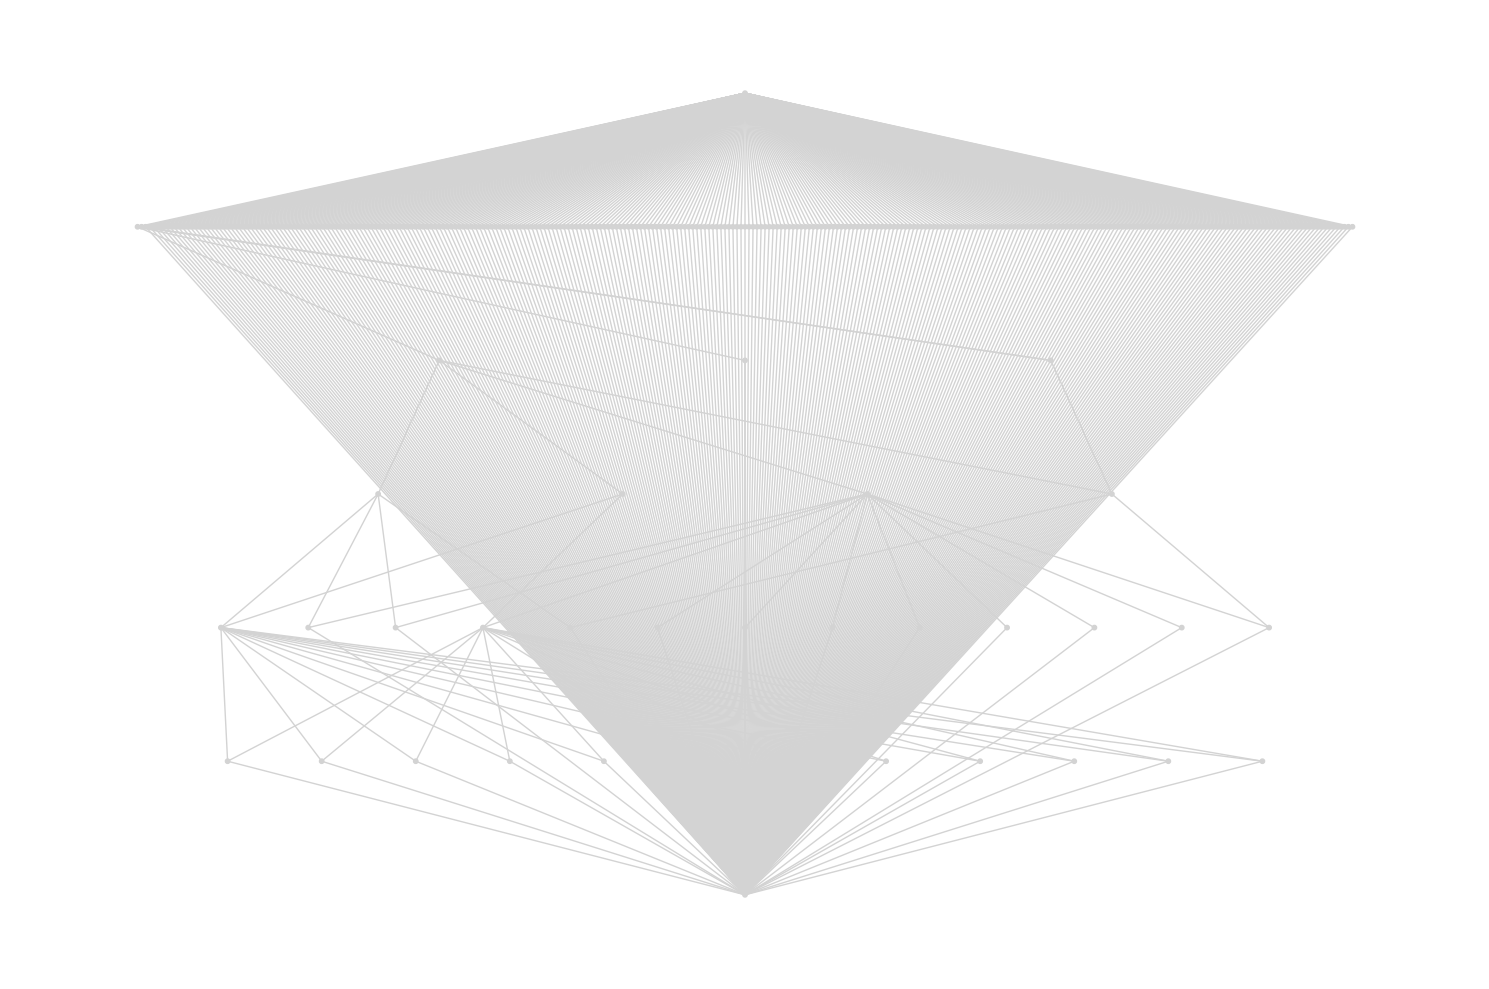

In [21]:
fig, ax = plt.subplots(figsize=(15,10))

viz = LineVizNx()
viz.draw_concept_lattice(L, ax=ax, node_label_func=None, node_size=10)
plt.tight_layout()
plt.show()

Obviously it is really hard to read the lattice with 337 concepts. So let us choose only the very stable concepts:

In [22]:
import numpy as np

n_best = 8

L.calc_concepts_measures('log_stability_lbound', mvK)  # estimate the stability
stabs = np.array(L.measures['log_stability_lbound'])  # put it into numpy array
stabs[[L.top, L.bottom]] = np.inf  # set the stability of the top and the bottom of the lattice to inf. As we definitely want them to be among the best concepts

best_idxs = sorted(np.argsort(stabs)[-n_best:])  # find the indices of the best concepts
L_best = ConceptLattice(L[best_idxs])  # construct the lattice of the best concepts

Let us also specify the label function for each concept in the lattice. So that the diagram would be easier to read

In [23]:
def node_label_support(el_i: int, L: ConceptLattice) -> str:
  return '\n'*2 + f"supp. {L[el_i].support:,}"

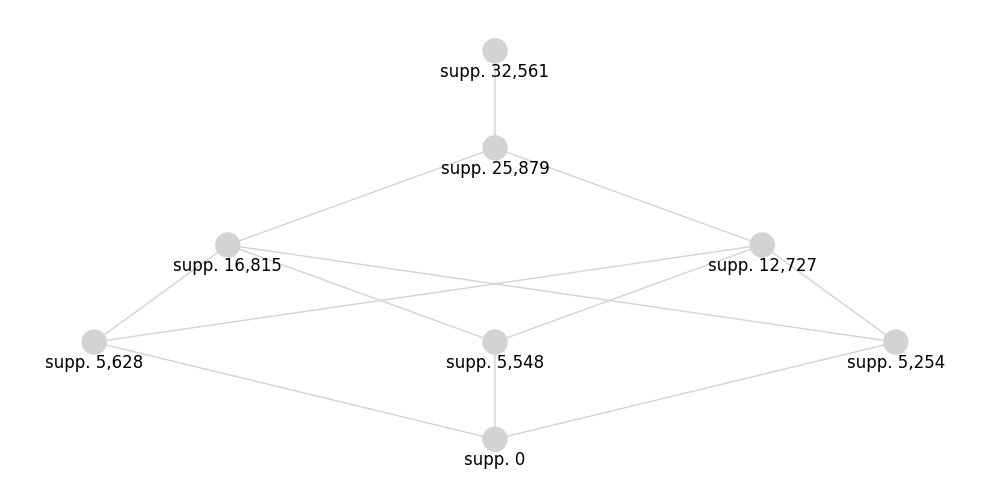

In [24]:
fig, ax = plt.subplots(figsize=(10,5))

viz.init_mover_per_poset(L_best)
viz.draw_concept_lattice(L_best, ax=ax, node_label_func=node_label_support)

plt.tight_layout()
plt.show()

Thus, we obtained a concept lattice of 8 stable concepts from Adult dataset (of 32k objects and 1k attributes). The final step would be to enhance the visualization.

# Part 3. Prettify the visualization

First, we define the new labeling function for the concepts in a diagram. So that we could read the intents of the concepts.

In [25]:
def node_label_reduced_intent(el_i: int, L: ConceptLattice, pstructures=mvK.pattern_structures):
  intent_i = L[el_i].intent_i
  # filter patterns in the intent so that they would not duplicate
  # the labels written for the parent concepts
  intent_i_reduced = {
      ps_i: pattern for ps_i, pattern in intent_i.items()
      if all(L[parent_i].intent_i[ps_i] != pattern for parent_i in L.parents(el_i))
  }

  # additionaly, order patterns in the intent by their support.
  # So that the patterns at the start of the label will be more specific.
  intent_verb = {
      pstructures[ps_i].describe_pattern(pattern):
      len(pstructures[ps_i].extension_i(pattern))
      for ps_i, pattern in intent_i_reduced.items()
  }
  intent_verb = sorted(intent_verb, key=lambda ptrn: intent_verb[ptrn])

  intent_verb = '\n'.join(intent_verb)
  return intent_verb

def node_label_final(el_i, L, pstructures=mvK.pattern_structures):
  # Do not show the intent of the top concepts (it is just too big)
  if el_i == L.top:  
    label = 'US adults'
  else:
    label = node_label_reduced_intent(el_i, L, pstructures)
  label += node_label_support(el_i, L)
  return label

Now, let us color the concepts. So that the more "blue" would be the concept, the less people with high income it describes.

Also, let us make node size proportional to the support of the concept.

In [26]:
cmap = plt.get_cmap('Blues_r')
mean_ys = [(df.loc[list(c.extent), 'income-per-year']=='>50K').mean() for c in L_best ]
node_color = [cmap(mean_y) for mean_y in mean_ys]

node_size = np.sqrt([c.support / len(mvK) for c in L_best])*10000

Now, we are ready to draw the final diagram of the stable concepts.

Note that we do not show the bottom concept, as it contains no objects.
And we slightly move the position of nodes using `viz.mover` so that the nodes labels would not overlap.

/usr/local/lib/python3.10/dist-packages/networkx/drawing/nx_pylab.py:433: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  node_collection = ax.scatter(


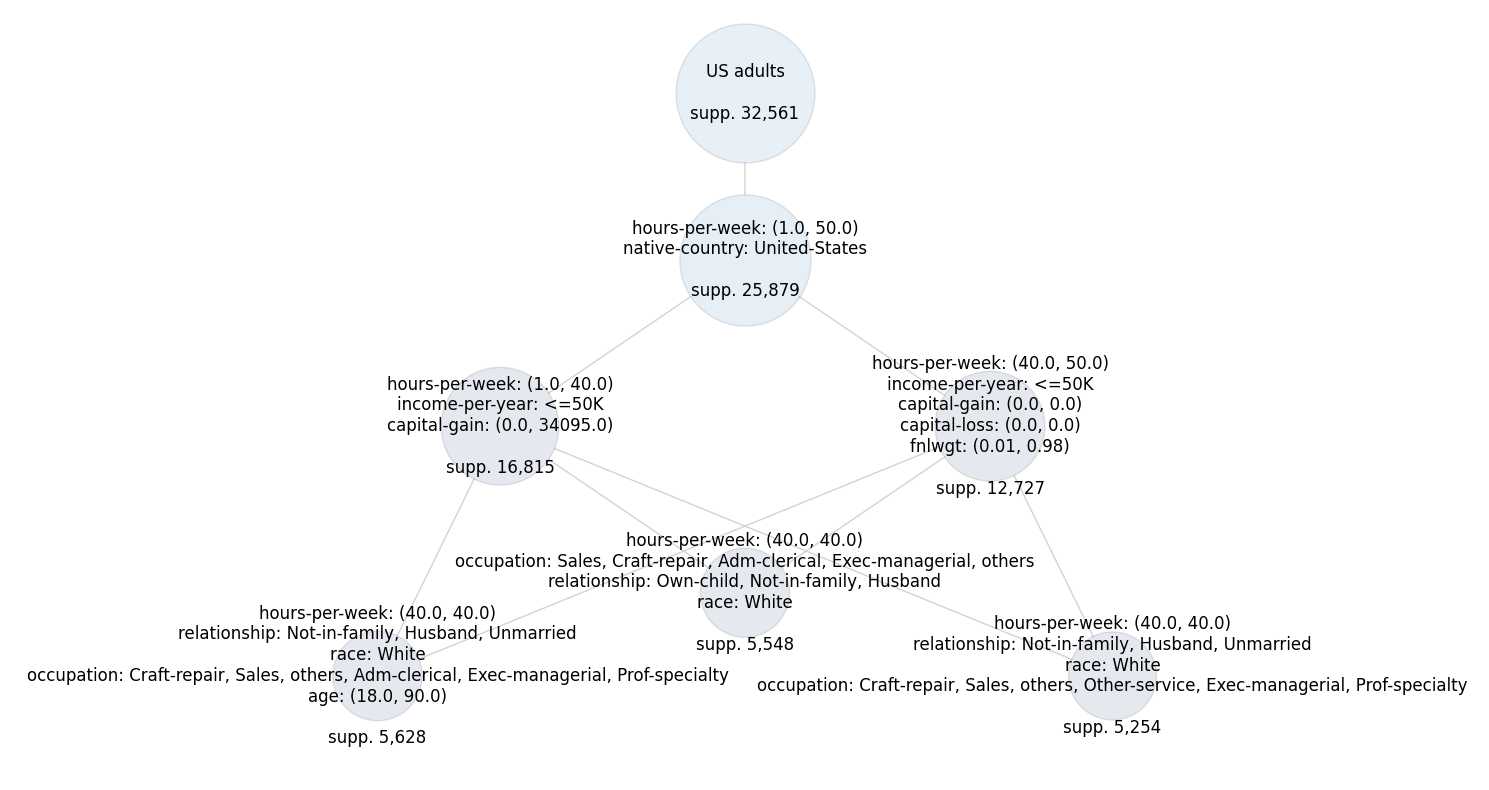

In [27]:
fig, ax = plt.subplots(figsize=(15,8))

viz.init_mover_per_poset(L_best)
viz.mover.pos = {node_i: (x, y-0.2 if node_i in {4, 6} else y)
                 for node_i, (x, y) in viz.mover.pos.items()}

viz.draw_concept_lattice(
    L_best, ax=ax,
    node_label_func=node_label_final,
    flg_drop_bottom_concept=True,
    node_size=node_size,
    node_alpha=0.1,
    node_color=node_color,
    node_border_color='black'
)

ax.set_ylim(-0.65, 1.2)
ax.set_xlim(-1, 1)
plt.tight_layout()
plt.show()

`Matplotlib` also allows to save figures to pdf file. So that they can be used afterwards.

In [28]:
fig.savefig('stable_concepts.pdf')

Now we get a lattice of stable concepts of Adult dataset.
It is still contains too many text, and the lables can be shortened.

However, this diagram allows to "make a quick look" at the dataset: get to know the size of the data, its important features and values of these features.

And, although, it takes some time to get a nicely looking visualization, the whole pipeline can be reproduced in under ten minutes.

# Post scriptum

There are also tools that simplify the transfer of results from Python to scientific paper.

For example, `pandas` package can convert the table to latex format. And since `FormalContext` can be easily converted to `pandas`, one can easily transfer it to the paper:

In [29]:
K_small = mvK.binarize()[:10,[20, 290, 350, 1100]]
K_small

FormalContext (10 objects, 4 attributes, 27 connections)
         |age: (37.0, 90.0)|fnlwgt: (0.01, 0.09)|marital-status: Divorced, Married-civ-spouse, others|hours-per-week: (1.0, 41.0)|
person 1 |                X|                   X|                                                    |                          X|
person 2 |                X|                   X|                                                   X|                          X|
person 3 |                X|                    |                                                   X|                          X|
person 4 |                X|                    |                                                   X|                          X|
person 5 |                 |                    |                                                   X|                          X|
person 6 |                X|                    |                                                   X|                          X|
person 7 |                

In [30]:
print(K_small.to_pandas().replace({False: '', True: 'X'}).style.to_latex())

\begin{tabular}{lllll}
 & age: (37.0, 90.0) & fnlwgt: (0.01, 0.09) & marital-status: Divorced, Married-civ-spouse, others & hours-per-week: (1.0, 41.0) \\
person 1 & X & X &  & X \\
person 2 & X & X & X & X \\
person 3 & X &  & X & X \\
person 4 & X &  & X & X \\
person 5 &  &  & X & X \\
person 6 & X &  & X & X \\
person 7 & X &  & X & X \\
person 8 & X &  & X &  \\
person 9 &  & X &  &  \\
person 10 & X &  & X & X \\
\end{tabular}



`Networkx` is a popular python package to work with graphs. And there is an add-on packge `network2tikz` that converts `networkx` graphs to `tikz` code.

A concept lattice `L` can be converted to `networkx` graph by runnning `L.to_networkx()`.

In [31]:
!pip install network2tikz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.1/41.1 kB 2.2 MB/s eta 0:00:00


In [32]:
from network2tikz import plot
L_best_graph = L_best.to_networkx()

In [33]:
plot(
  L_best_graph, 'stable_concepts_tikz.tex',
  layout=viz.mover.pos,
  node_color=[tuple([int(x*256) for x in clr[:3]]) for clr in node_color],
  node_opacity=0.1,
  #node_label=[node_label_reduced_intent(c_i, L).replace('\n',',') for c_i in range(len(L_best))],
  node_size=(node_size/node_size.max()).tolist()
)

The previous command create the .tex file with tikz code for the concept lattice visualization. This code can be compiled, for example, in Overleaf.

In [34]:
!cat stable_concepts_tikz.tex

\documentclass{standalone}
\usepackage{tikz-network}
\begin{document}
\begin{tikzpicture}
\clip (0,0) rectangle (6,6);
\Vertex[x=3.000,y=5.450,size=1.0,color={30,110,179},opacity=0.1,RGB]{0}
\Vertex[x=3.000,y=4.225,size=0.8915,color={27,106,176},opacity=0.1,RGB]{1}
\Vertex[x=1.979,y=3.000,size=0.7186,color={8,48,107},opacity=0.1,RGB]{2}
\Vertex[x=4.021,y=3.000,size=0.6252,color={8,48,107},opacity=0.1,RGB]{3}
\Vertex[x=1.469,y=1.163,size=0.4157,color={8,48,107},opacity=0.1,RGB]{4}
\Vertex[x=3.000,y=1.775,size=0.4128,color={8,48,107},opacity=0.1,RGB]{5}
\Vertex[x=4.531,y=1.163,size=0.4017,color={8,48,107},opacity=0.1,RGB]{6}
\Vertex[x=3.000,y=0.550,size=0.0,color={0,0,0},opacity=0.1,RGB]{7}
\Edge[,Direct](0)(1)
\Edge[,Direct](1)(2)
\Edge[,Direct](1)(3)
\Edge[,Direct](2)(4)
\Edge[,Direct](2)(5)
\Edge[,Direct](2)(6)
\Edge[,Direct](3)(4)
\Edge[,Direct](3)(5)
\Edge[,Direct](3)(6)
\Edge[,Direct](4)(7)
\Edge[,Direct](5)(7)
\Edge[,Direct](6)(7)
\end{tikzpicture}
\end{document}